# Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import time

sns.set_style("whitegrid")

In [2]:
T = pd.read_csv("./data/pumpFeatures.csv")
X, y = T.iloc[:, :-1], T.faultCode
T.head()

,wMotor_mean,wMotor_std,wMotor_fftPeakIdx,wMotor_skewness,wMotor_kurtosis,wMotor_peak2peak,wMotor_peak2rms,wMotor_rms,wMotor_mad,wMotor_csRange,...,pOut_peak2peak,pOut_peak2rms,pOut_rms,pOut_mad,pOut_csRange,pOut_pLow,pOut_pMid,pOut_pHigh,pOut_pKur,faultCode
0,876.235677,6.204772,762,-0.164601,2.881123,39.070726,1.018288,876.257629,5.032113,1.225859e+06,...,0.125500,1.007635,7.226002,0.019002,10109.108199,0.000091,0.007472,0.001348,0.076296,0
1,876.238247,6.077463,762,-0.147077,2.673731,34.570767,1.016957,876.259308,4.982643,1.225862e+06,...,0.120924,1.007091,7.225622,0.018990,10108.578309,0.000118,0.006954,0.001434,0.076296,0
2,876.031159,6.250861,762,-0.123501,2.551445,35.491460,1.017266,876.053444,5.165914,1.225575e+06,...,0.131161,1.007494,7.225906,0.019032,10108.963684,0.000060,0.006570,0.001309,0.076296,0
3,876.196665,6.247495,762,-0.134596,2.728913,41.529486,1.018873,876.218921,5.093603,1.225799e+06,...,0.123254,1.007770,7.225914,0.018717,10108.973834,0.000066,0.007190,0.001364,0.076296,0
4,876.199734,6.095278,762,-0.139257,2.705275,36.096733,1.018066,876.220919,4.962708,1.225812e+06,...,0.123759,1.006735,7.225260,0.019078,10108.065292,0.000051,0.007814,0.001600,0.071808,0


This code fits a 10-fold cross-validated Naive Bayes model to the original data and calculates the mean accuracy.

In [3]:
classifier = GaussianNB()
kf = KFold(n_splits=10, shuffle=True)

start_time = time.time()
cv_results = cross_validate(classifier, X, y, cv=kf)
elapsed_time = time.time() - start_time

print("Accuracies:", cv_results['test_score'])
print("Mean accuracy:", cv_results['test_score'].mean())
print(f"Cross validation elapsed time: {elapsed_time:.4f} seconds")

Accuracies: [0.85 0.77 0.78 0.78 0.82 0.78 0.85 0.82 0.77 0.76]
Mean accuracy: 0.798
Cross validation elapsed time: 0.0635 seconds


To perform PCA, we need to standardize our data so that all variables have the same standard deviation. We can do this using the [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn-preprocessing-standardscaler) class.

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,0.761963,-0.276863,0.521589,-0.499031,0.611531,0.331619,-0.884090,0.761949,-0.462521,0.761936,...,0.030409,0.051537,0.241104,0.920290,0.093929,0.920597,-0.543398,0.644893,-0.261611,-0.494055
1,0.761982,-0.479509,0.521589,-0.412168,0.092077,-0.480041,-1.134136,0.761961,-0.576916,0.761953,...,0.002746,-0.136325,-0.192894,0.911183,0.091293,0.911537,-0.536813,0.508081,-0.167566,-0.494055
2,0.760444,-0.203501,0.521589,-0.295304,-0.214212,-0.313975,-1.076132,0.760432,-0.153123,0.760428,...,-0.134764,0.283964,0.128468,0.917991,0.101093,0.918126,-0.550828,0.406787,-0.303854,-0.494055
3,0.761673,-0.208858,0.521589,-0.350300,0.230292,0.775107,-0.774117,0.761661,-0.320333,0.761616,...,0.012452,-0.040659,0.348847,0.918167,0.027846,0.918300,-0.549482,0.570470,-0.243417,-0.494055
4,0.761696,-0.451152,0.521589,-0.373404,0.171086,-0.204801,-0.925733,0.761676,-0.623013,0.761686,...,-0.024902,-0.019941,-0.476881,0.902539,0.111666,0.902767,-0.553066,0.735317,0.013755,-0.499526


We can use the [PCA()](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn-decomposition-pca) class to get transformed data and the percent variance explained by each principal component.

In [5]:
pca = PCA(n_components=X_scaled.shape[1])
X_pca = pca.fit_transform(X_scaled)
variance_ratio = pca.explained_variance_ratio_
pd.DataFrame(X_pca).head()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,3.995834,-3.473140,-1.913195,0.281829,0.912319,-0.304593,-0.361051,0.301689,0.319623,0.829489,...,1.079325e-05,-0.000035,0.000126,-0.000060,0.000035,1.645872e-05,-0.000002,-3.230438e-06,-1.010162e-07,1.662300e-07
1,3.827812,-3.348048,-1.745795,-0.214792,1.233001,-0.779718,0.882782,1.180464,0.154326,0.282015,...,1.253552e-04,-0.000189,-0.000039,0.000041,-0.000062,1.461256e-05,-0.000005,5.338561e-06,8.214242e-08,4.633205e-07
2,3.703627,-3.104565,-1.635607,0.213781,1.213763,1.849016,0.812354,0.581409,-0.025943,-0.237466,...,-3.074947e-04,0.000055,0.000052,0.000054,-0.000034,2.727376e-05,0.000022,3.830163e-06,-1.073869e-06,2.319821e-07
3,4.304386,-3.451898,-2.053170,-0.110739,0.740155,1.097913,-0.436283,-0.125187,-0.400711,0.319951,...,-4.789442e-04,-0.000113,0.000034,0.000005,0.000046,3.315425e-05,-0.000019,6.963634e-07,-1.053530e-06,-5.477753e-07
4,3.630406,-3.143359,-1.458249,0.660197,0.895655,-0.381060,-0.440083,-0.872264,-1.764358,0.922784,...,7.653401e-07,0.000130,-0.000080,0.000153,-0.000088,-1.832459e-07,-0.000004,8.071328e-07,5.661745e-07,9.755440e-07


We can use a pareto plot to visualize the variance explained by the principle components.

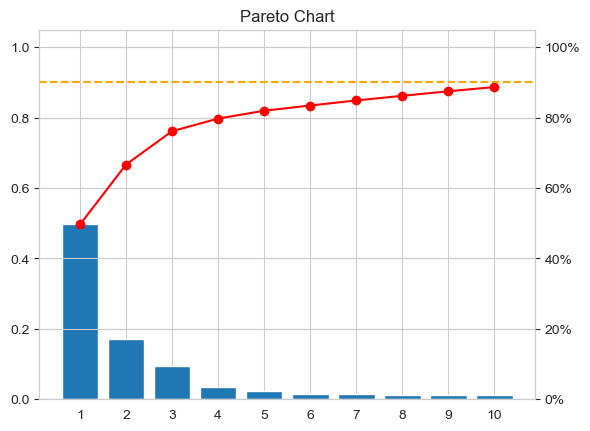

In [6]:
fig, ax = plt.subplots()

# Plot bars (i.e. frequencies)
ax.bar(np.arange(1, 11), variance_ratio[:10])
ax.set_ylim(0, variance_ratio.sum()*1.05)
ax.set_title("Pareto Chart")
ax.set_xticks(np.arange(1, 11))

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(np.arange(1, 11), (variance_ratio * 100).cumsum()[:10], color="red", marker="o")
ax2.axhline(90, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylim(0, 100*1.05)

plt.show()

The Pareto chart shows that the first ten principal components explain approximately 90% of the variance. How many principal components do we need to explain at least 99% of the variance?

In [7]:
np.argmax(variance_ratio.cumsum() >= 0.99)

27

The first 28 principal components explain more than 99% of the variance.

In [8]:
X_pca = X_pca[:, :28]
classifier = GaussianNB()
kf = KFold(n_splits=10, shuffle=True)

start_time = time.time()
cv_results = cross_validate(classifier, X_pca, y, cv=kf)
elapsed_time = time.time() - start_time

print("Accuracies:", cv_results['test_score'])
print("Mean accuracy:", cv_results['test_score'].mean())
print(f"Cross validation elapsed time: {elapsed_time:.4f} seconds")

Accuracies: [0.69 0.61 0.73 0.71 0.7  0.78 0.68 0.65 0.79 0.68]
Mean accuracy: 0.702
Cross validation elapsed time: 0.0340 seconds
